In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import acos, sqrt, pi, cos

def cvtGrayscale(img):
    if len(img.shape) < 3:
        return img
    b, l, c = img.shape
    gray = np.zeros((b,l), dtype = "int64")
    for i in range(b):
        for j in range(l):
            gray[i][j] = (0.299*img[i][j][0] + 0.587*img[i][j][1] + 0.114*img[i][j][2])
    return gray

## Q5) Given the image shinchan blur.png that is deliberately blurred using a Gaussian point spread function of width σ.

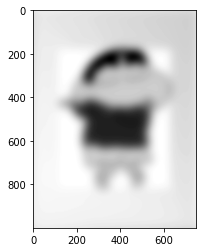

In [3]:
img_shin = cv2.imread('../images/shinchan_blur.png')
img_shin = cvtGrayscale(img_shin)
plt.imshow(img_shin, cmap='gray')

### 1) Write a program that creates an array, of the same size as the photo, sampled from Gaussian point spread function (psf ) f(x,y) with σ of your own choice. Display this array, remember that the point spread function is periodic (along both axes), which means that the values for negative x and y are repeated at the end of the interval. Since the Gaussian is centered on the origin, this means there should be bright patches in each of the four corners of your picture.

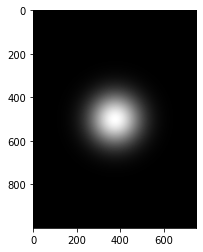

In [4]:
def createpsf(img, sigma):
    b,l = img.shape
    out = np.copy(img)
    psf = np.zeros((b,l))
    s = 2*(sigma**2)
    for i in range(b):
        for j in range(l):
            psf[i][j] = (1/(pi*s))*np.exp(-1*((i-b//2)**2 + (j-l//2)**2)/s)
    psf = 255*(psf/np.linalg.norm(psf))
    return psf

img_psf = createpsf(img_shin, 80)
plt.imshow(img_psf, cmap='gray')

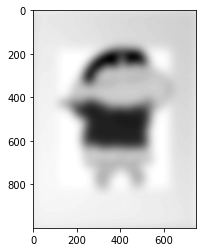

In [7]:
shin_fft = np.fft.fft2(img_shin)
psf_fft = np.fft.fft2(img_psf)
img_clear = np.abs(np.fft.ifft2(shin_fft))#np.fft.ifftshift(img_fft)))
img_clear = img_clear.astype('int64')
plt.imshow(img_clear, cmap="gray")